## Exercise 2.5

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from modules.multi_armed_bandit import MultiArmedBandit
from modules.player import *

def play(num_players, steps,
         epsilon=0.1, alpha_css=0.0):
    players = []
    vals = []
    percent_optimal = []

    for num_players in range(num_players):
        players.append(Player(bandit=MultiArmedBandit(), epsilon=epsilon,
                              alpha_css=alpha_css))

    for step in range(steps):
        sum_val = 0.0
        sum_optimal = 0.0
        for player in players:
            val, arm, is_optimal = player.draw()
            sum_val += val
            if is_optimal:
                sum_optimal += 1.0
        print('End = {0}, {1}'.format(step, sum_optimal), end='\r')
        vals.append(sum_val / len(players))
        percent_optimal.append(100 * sum_optimal / len(players))
    return vals, percent_optimal

In [7]:
vals1, percent_optimal1 = play(2000, 20000, epsilon=0.1, alpha_css=0.0)
vals2, percent_optimal2 = play(2000, 20000, epsilon=0.1, alpha_css=0.1)

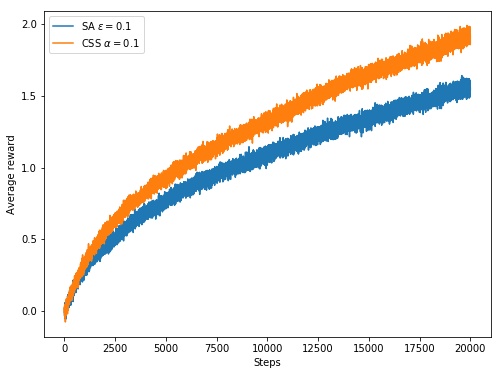

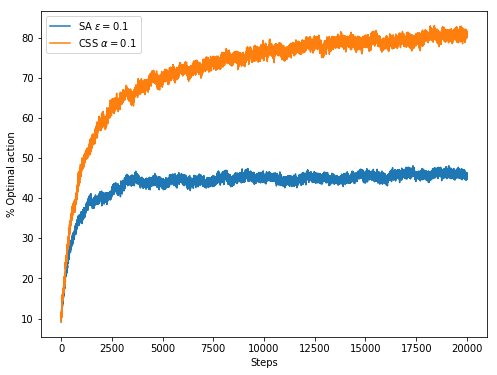

In [8]:
plt.figure(1)
plt.xlabel("Steps")
plt.ylabel("Average reward")
sample_avg, = plt.plot(vals1, label=r'SA $\epsilon=0.1$')
constant_step_size, = plt.plot(vals2, label=r'CSS $\alpha=0.1$')
plt.legend(handles=[sample_avg, constant_step_size])
plt.show()

plt.figure(2)
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
sample_avg, = plt.plot(percent_optimal1, label=r'SA $\epsilon=0.1$')
constant_step_size, = plt.plot(percent_optimal2, label=r'CSS $\alpha=0.1$')
plt.legend(handles=[sample_avg, constant_step_size])
plt.show()